<a href="https://colab.research.google.com/github/encodergsb/Actividad-1/blob/main/Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#for i in df['amenities']:
#  if int(i).values_counts == 10:
#    i = 10


#df['amenities']

In [2]:
#Importar las librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
#Leer la base de datos usando Pandas
df= pd.read_csv('listings.csv')
cdmx= df.loc[:,['room_type','number_of_reviews','host_acceptance_rate','price','availability_365','beds','bedrooms','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
cdmx["host_acceptance_rate"] = cdmx["host_acceptance_rate"].str.replace("%","")
cdmx['host_acceptance_rate'] = cdmx['host_acceptance_rate'].astype(float)
cdmx["price"] = cdmx["price"].str.replace("$","")
cdmx["price"] = cdmx["price"].str.replace(",","")
cdmx['price'] = cdmx['price'].astype(float)

cdmx.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,beds,bedrooms,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Entire home/apt,0,NaN,4001.0,363,1.0,1.0,NaN,NaN,NaN
1,Private room,27,100.0,500.0,363,4.0,2.0,4.96,4.93,4.93
2,Private room,144,67.0,599.0,323,1.0,1.0,4.73,4.70,4.91
3,Entire home/apt,58,79.0,18000.0,331,8.0,5.0,4.59,4.70,4.75
4,Entire home/apt,61,100.0,740.0,314,2.0,2.0,4.85,4.80,4.95


In [28]:
#CDMX["host_acceptance_rate"] = CDMX["host_acceptance_rate"].str.replace("%","")
cdmx['price'] = cdmx['price'].fillna(np.mean)
cdmx['host_acceptance_rate'].fillna(cdmx['host_acceptance_rate'].mean(), inplace = True)
cdmx['review_scores_rating'].fillna(cdmx['review_scores_rating'].mean(), inplace = True)
cdmx['review_scores_cleanliness'].fillna(cdmx['review_scores_cleanliness'].mean(), inplace = True)
cdmx['review_scores_communication'].fillna(cdmx['review_scores_communication'].mean(), inplace = True)

cdmx


,room_type,number_of_reviews,host_acceptance_rate,price,availability_365,beds,bedrooms,review_scores_rating,review_scores_cleanliness,review_scores_communication
0,Entire home/apt,0,89.695894,4001.0,363,1.0,1.0,4.704128,4.748089,4.814688
1,Private room,27,100.000000,500.0,363,4.0,2.0,4.960000,4.930000,4.930000
2,Private room,144,67.000000,599.0,323,1.0,1.0,4.730000,4.700000,4.910000
3,Entire home/apt,58,79.000000,18000.0,331,8.0,5.0,4.590000,4.700000,4.750000
4,Entire home/apt,61,100.000000,740.0,314,2.0,2.0,4.850000,4.800000,4.950000
...,...,...,...,...,...,...,...,...,...,...
22943,Shared room,0,89.695894,450.0,365,1.0,1.0,4.704128,4.748089,4.814688
22944,Private room,3,89.695894,750.0,89,1.0,2.0,5.000000,5.000000,5.000000
22945,Entire home/apt,28,100.000000,5041.0,348,7.0,6.0,4.890000,4.960000,4.930000
22946,Entire home/apt,72,99.000000,1100.0,361,1.0,NaN,4.440000,4.640000,4.290000


In [29]:

mx = cdmx.copy()

In [ ]:
'''df2 = df2.fillna(round(df.mean(), 1))''' #Para hacer el fillna con cuantitativos
'''df1 = df.fillna(method='bfill')''' #Para hacer el la imputación de las celdas cualitativas y cuantitativas 

Pasamos a eliminar los outliers del Frame

In [49]:
shared = mx[mx['room_type']=='Shared room']
shared.drop('room_type',axis=1, inplace=True)
y=shared

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 6.5*iqr
Limite_Inferior_iqr= percentile25 - 6.5*iqr
df3= shared[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

shared=df3.copy()
shared=shared.fillna(round(df3.mean(),1))

In [64]:
priv = mx[mx['room_type']=='Private room']
priv.drop('room_type',axis=1, inplace=True)
y=priv

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 6.5*iqr
Limite_Inferior_iqr= percentile25 - 6.5*iqr
df3= priv[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

priv_room=df3.copy()
priv_room=priv_room.fillna(round(df3.mean(),1))

In [39]:
entire = mx[mx['room_type']=='Entire home/apt']
entire.drop('room_type',axis=1, inplace=True)
y=shared

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 6.5*iqr
Limite_Inferior_iqr= percentile25 - 6.5*iqr
df3= shared[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]

entire=df3.copy()
entire=entire.fillna(round(df3.mean(),1))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Shared Room

Text(0, 0.5, 'number_of_reviews')

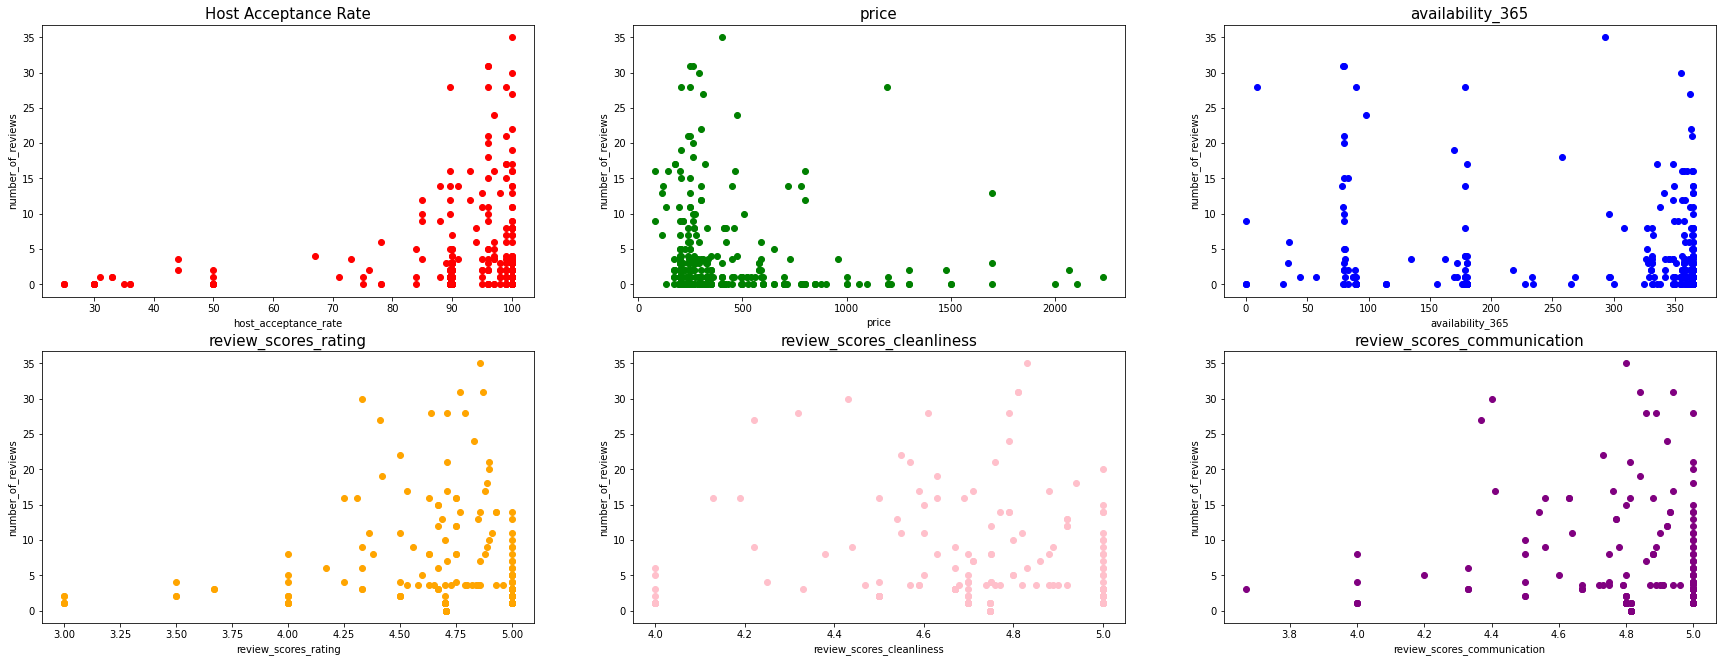

In [55]:
from turtle import color
import matplotlib.pyplot as plt
fig= plt.figure(figsize=[30,11])
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.set_title('Host Acceptance Rate', fontsize=15)
ax1.scatter(x='host_acceptance_rate', y = 'number_of_reviews', c = 'red', data = shared)
ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


ax2.set_title('price', fontsize=15)
ax2.scatter(x='price', y = 'number_of_reviews', c = 'green', data = shared)
ax2.set_xlabel(r'price')
ax2.set_ylabel(r'number_of_reviews')


ax3.set_title('availability_365', fontsize=15)
ax3.scatter(x='availability_365', y = 'number_of_reviews', c = 'blue', data = shared)
ax3.set_xlabel(r'availability_365')
ax3.set_ylabel(r'number_of_reviews')


ax4.set_title('review_scores_rating', fontsize=15)
ax4.scatter(x='review_scores_rating', y = 'number_of_reviews', c = 'orange', data = shared)
ax4.set_xlabel(r'review_scores_rating')
ax4.set_ylabel(r'number_of_reviews')


ax5.set_title('review_scores_cleanliness', fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y = 'number_of_reviews', c = 'pink', data = shared)
ax5.set_xlabel(r'review_scores_cleanliness')
ax5.set_ylabel(r'number_of_reviews')


ax6.set_title('review_scores_communication', fontsize=15)
ax6.scatter(x='review_scores_communication', y = 'number_of_reviews', c = 'purple', data = shared)
ax6.set_xlabel(r'review_scores_communication')
ax6.set_ylabel(r'number_of_reviews')


In [43]:
from sklearn.linear_model import LinearRegression
column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = shared.loc[:,column_sels]
y = shared['number_of_reviews']

print('Shared room')
for i, k in enumerate(column_sels): #i índice, k valores
  model = LinearRegression()
  model.fit(X=np.array(x[k]).reshape(-1,1), y=np.array(y).reshape(-1,1))
  model.__dict__
  print(column_sels[i], model.score(np.array(x[k]).reshape(-1,1),np.array(y).reshape(-1,1)))

Shared room
price 0.004444278399522661
host_acceptance_rate 0.019563187378069835
availability_365 0.003913286990574361
review_scores_rating 0.0038703930319675672
review_scores_cleanliness 0.004296031765542274
review_scores_communication 0.005560387637971065


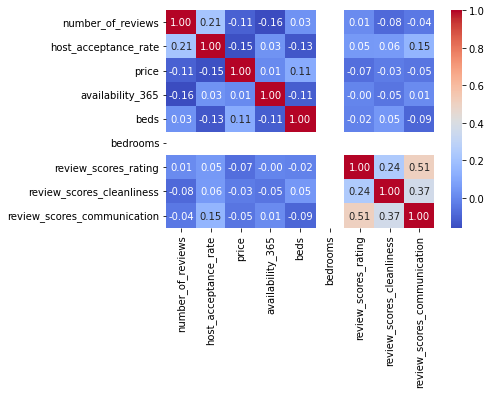

In [54]:
hms = sns.heatmap(shared.corr(),cmap='coolwarm', annot = True, fmt='.2f')

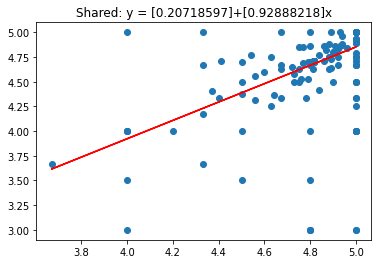

In [68]:
x = np.array(shared['review_scores_communication']).reshape(-1,1)
y = np.array(shared['review_scores_rating']).reshape(-1,1)

#Creamos el modelo
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

#Graficamos
fig,ax = plt.subplots()
leyenda = 'y = ' + str(reg.intercept_)+ '+' + str(reg.coef_[0]) + 'x'
ax.set_title('Shared: ' + leyenda)

ax.plot(x,y_pred,c='red')
ax.scatter(x,y)

## Apartment

Text(0, 0.5, 'number_of_reviews')

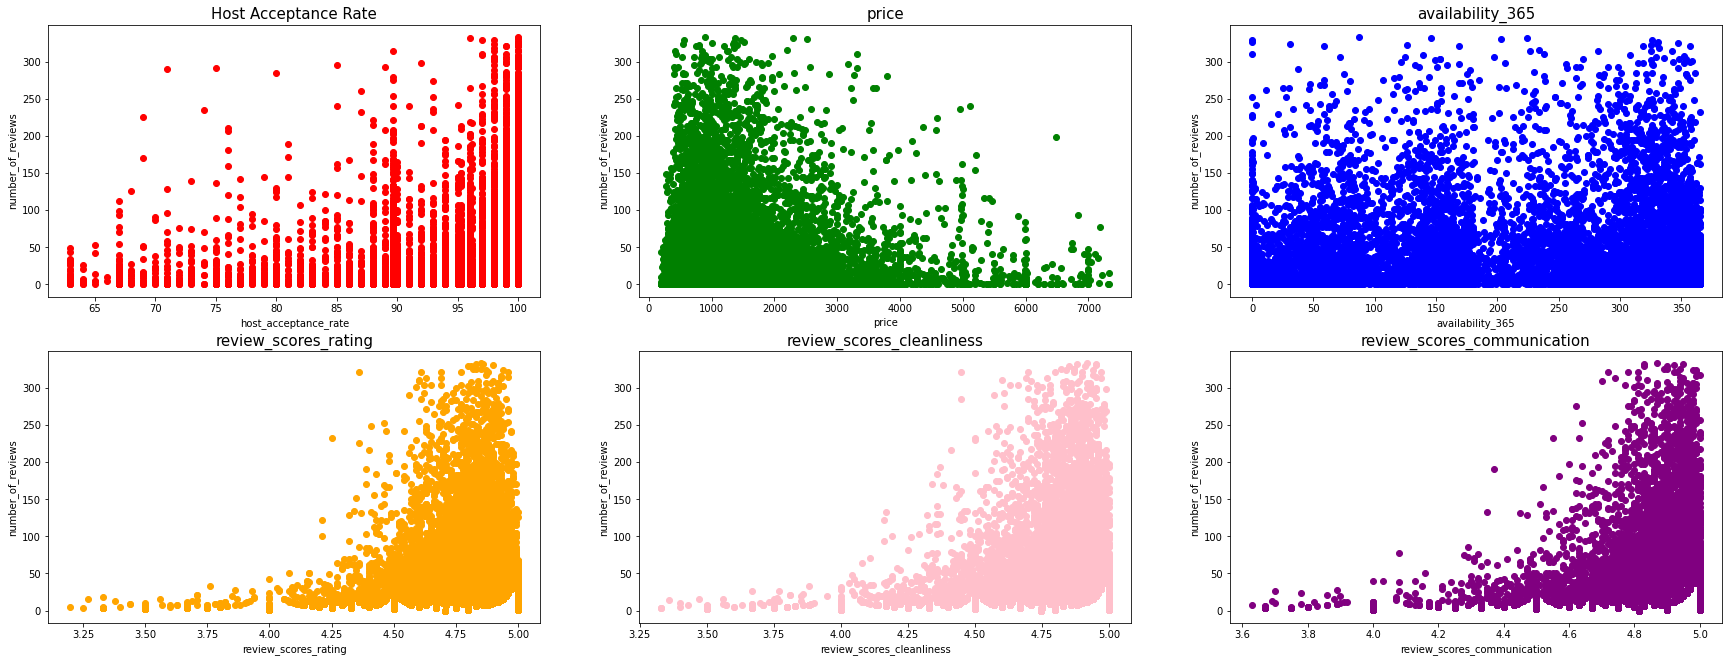

In [56]:
fig= plt.figure(figsize=[30,11])
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.set_title('Host Acceptance Rate', fontsize=15)
ax1.scatter(x='host_acceptance_rate', y = 'number_of_reviews', c = 'red', data = entire)
ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


ax2.set_title('price', fontsize=15)
ax2.scatter(x='price', y = 'number_of_reviews', c = 'green', data = entire)
ax2.set_xlabel(r'price')
ax2.set_ylabel(r'number_of_reviews')


ax3.set_title('availability_365', fontsize=15)
ax3.scatter(x='availability_365', y = 'number_of_reviews', c = 'blue', data = entire)
ax3.set_xlabel(r'availability_365')
ax3.set_ylabel(r'number_of_reviews')


ax4.set_title('review_scores_rating', fontsize=15)
ax4.scatter(x='review_scores_rating', y = 'number_of_reviews', c = 'orange', data = entire)
ax4.set_xlabel(r'review_scores_rating')
ax4.set_ylabel(r'number_of_reviews')


ax5.set_title('review_scores_cleanliness', fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y = 'number_of_reviews', c = 'pink', data = entire)
ax5.set_xlabel(r'review_scores_cleanliness')
ax5.set_ylabel(r'number_of_reviews')


ax6.set_title('review_scores_communication', fontsize=15)
ax6.scatter(x='review_scores_communication', y = 'number_of_reviews', c = 'purple', data = entire)
ax6.set_xlabel(r'review_scores_communication')
ax6.set_ylabel(r'number_of_reviews')


In [58]:
column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = entire.loc[:,column_sels]
y = entire['number_of_reviews']

print('Entire Room')
for i, k in enumerate(column_sels): #i índice, k valores
  model = LinearRegression()
  model.fit(X=np.array(x[k]).reshape(-1,1), y=np.array(y).reshape(-1,1))
  model.__dict__
  print(column_sels[i], model.score(np.array(x[k]).reshape(-1,1),np.array(y).reshape(-1,1)))

Entire Room
price 0.004275635069219241
host_acceptance_rate 0.017905796392135964
availability_365 0.0036727515680461398
review_scores_rating 0.00385425586445054
review_scores_cleanliness 0.004246332741276504
review_scores_communication 0.005594425408356862


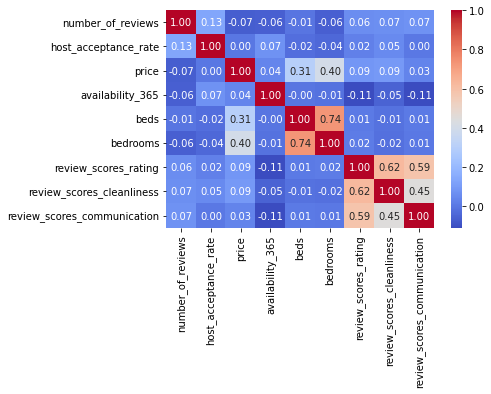

In [57]:
hmp = sns.heatmap(entire.corr(),cmap='coolwarm', annot = True, fmt='.2f')

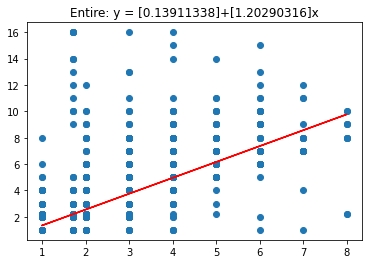

In [81]:
x = np.array(entire['bedrooms']).reshape(-1,1)
y = np.array(entire['beds']).reshape(-1,1)

#Creamos el modelo
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

#Graficamos
fig,ax = plt.subplots()
leyenda = 'y = ' + str(reg.intercept_)+ '+' + str(reg.coef_[0]) + 'x'
ax.set_title('Entire: ' + leyenda)

ax.plot(x,y_pred,c='red')
ax.scatter(x,y)

## Private Room

Text(0, 0.5, 'number_of_reviews')

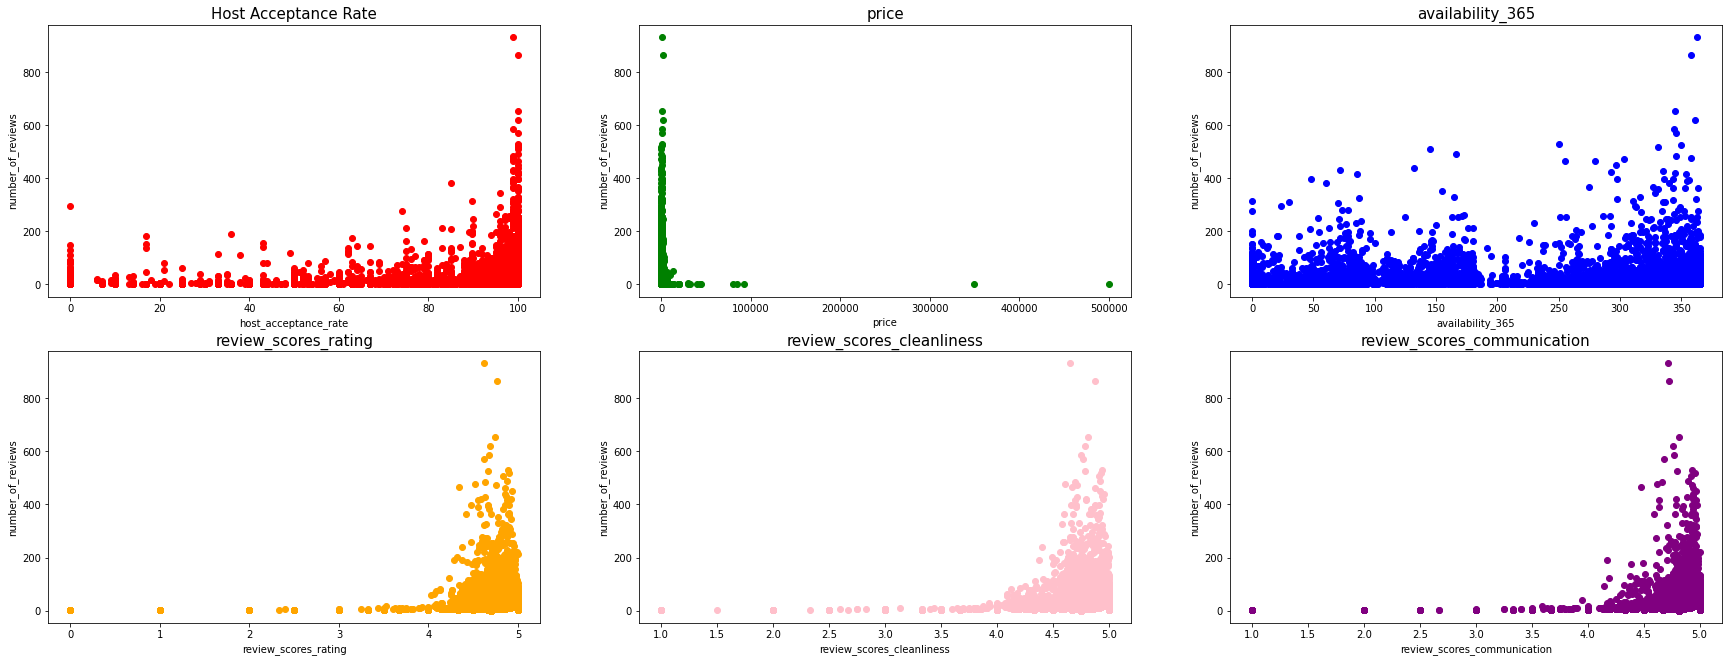

In [65]:
fig= plt.figure(figsize=[30,11])
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

ax1.set_title('Host Acceptance Rate', fontsize=15)
ax1.scatter(x='host_acceptance_rate', y = 'number_of_reviews', c = 'red', data = priv)
ax1.set_xlabel(r'host_acceptance_rate')
ax1.set_ylabel(r'number_of_reviews')


ax2.set_title('price', fontsize=15)
ax2.scatter(x='price', y = 'number_of_reviews', c = 'green', data = priv)
ax2.set_xlabel(r'price')
ax2.set_ylabel(r'number_of_reviews')


ax3.set_title('availability_365', fontsize=15)
ax3.scatter(x='availability_365', y = 'number_of_reviews', c = 'blue', data = priv)
ax3.set_xlabel(r'availability_365')
ax3.set_ylabel(r'number_of_reviews')


ax4.set_title('review_scores_rating', fontsize=15)
ax4.scatter(x='review_scores_rating', y = 'number_of_reviews', c = 'orange', data = priv)
ax4.set_xlabel(r'review_scores_rating')
ax4.set_ylabel(r'number_of_reviews')


ax5.set_title('review_scores_cleanliness', fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y = 'number_of_reviews', c = 'pink', data = priv)
ax5.set_xlabel(r'review_scores_cleanliness')
ax5.set_ylabel(r'number_of_reviews')


ax6.set_title('review_scores_communication', fontsize=15)
ax6.scatter(x='review_scores_communication', y = 'number_of_reviews', c = 'purple', data = priv)
ax6.set_xlabel(r'review_scores_communication')
ax6.set_ylabel(r'number_of_reviews')


In [66]:
column_sels = ['price','host_acceptance_rate','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication']
x = priv_room.loc[:,column_sels]
y = priv_room['number_of_reviews']

print('Private room')
for i, k in enumerate(column_sels): #i índice, k valores
  model = LinearRegression()
  model.fit(X=np.array(x[k]).reshape(-1,1), y=np.array(y).reshape(-1,1))
  model.__dict__
  print(column_sels[i], model.score(np.array(x[k]).reshape(-1,1),np.array(y).reshape(-1,1)))

Private room
price 0.005389172949229026
host_acceptance_rate 0.016215860030568074
availability_365 0.008690376476888528
review_scores_rating 0.00787036131415253
review_scores_cleanliness 0.0026858856315504775
review_scores_communication 0.001932456755003531


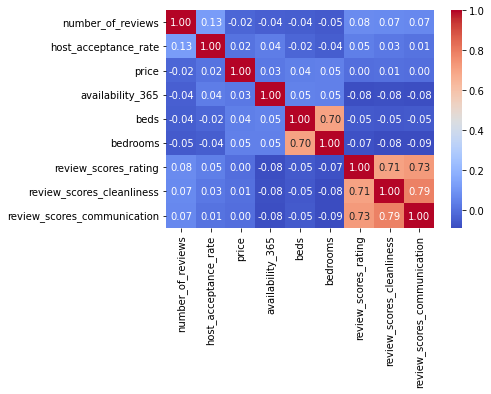

In [67]:
hmp = sns.heatmap(priv.corr(),cmap='coolwarm', annot = True, fmt='.2f')

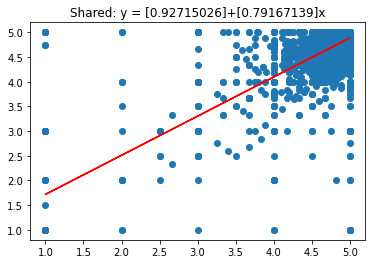

In [72]:
x = np.array(priv['review_scores_communication']).reshape(-1,1)
y = np.array(priv['review_scores_cleanliness']).reshape(-1,1)

#Creamos el modelo
reg = LinearRegression().fit(x,y)
y_pred = reg.predict(x)

#Graficamos
fig,ax = plt.subplots()
leyenda = 'y = ' + str(reg.intercept_)+ '+' + str(reg.coef_[0]) + 'x'
ax.set_title('Shared: ' + leyenda)

ax.plot(x,y_pred,c='red')
ax.scatter(x,y)

## Tabla de coeficientes de determinacion y correlacion por cada habitacion

In [76]:
df = pd.DataFrame(columns=['Room type', 'Coef_deter', 'Coef_correl'])
df['Room type'] = ['Entire room', 'Private room', 'Shared room']
model_en = LinearRegression().fit(X=entire[['host_acceptance_rate']],y=entire[['number_of_reviews']])
deter_en = model_en.score(X=entire[['host_acceptance_rate']],y=entire[['number_of_reviews']])
model_priv = LinearRegression().fit(X=priv[['host_acceptance_rate']],y=priv[['number_of_reviews']])
deter_priv = model_priv.score(X=priv[['host_acceptance_rate']],y=priv[['number_of_reviews']])
model_shared = LinearRegression().fit(X=shared[['host_acceptance_rate']],y=shared[['number_of_reviews']])
deter_shared = model_shared.score(X=shared[['host_acceptance_rate']],y=shared[['number_of_reviews']])
df['Coef_deter'] = [deter_en, deter_priv, deter_shared]
correl_en = np.sqrt(deter_en)
correl_priv = np.sqrt(deter_priv)
correl_shared = np.sqrt(deter_shared)
df['Coef_correl'] = [correl_en, correl_priv, correl_shared]
df

,Room type,Coef_deter,Coef_correl
0,Entire room,0.017906,0.133813
1,Private room,0.015648,0.125091
2,Shared room,0.044840,0.211755


# Estambul